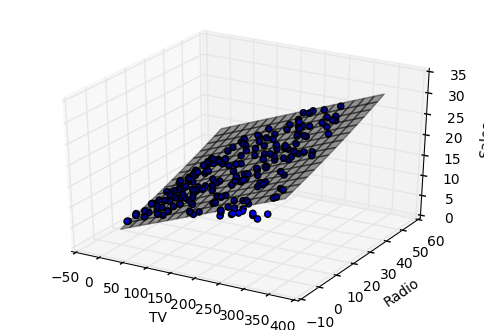

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ Radio + TV + I(Radio**2)', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()


In [59]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     573.8
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           9.20e-97
Time:                        02:44:24   Log-Likelihood:                -385.63
No. Observations:                 200   AIC:                             779.3
Df Residuals:                     196   BIC:                             792.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         3.1558      0.369      8.550      0.000         2.428     3.884
Radio             0.1560      0.031      4.969      0.000         0.094     0.218
TV                0.0458      0.001     32.926      0.000         0.043     0.049
I(Radio ** 2)     0.0007      0.001      1.054      0.293        -0.001     0.002
==============================================================================
Omnibus:                       66.663   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.446
Skew:                          -1.456   Prob(JB):                     2.17e-38
Kurtosis:                       6.513   Cond. No.                     3.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
out.reshape(x_surf.shape).shape

(15, 18)

In [29]:
out = fit.predict(exog)
out.shape

(270,)